# Extracción de características
---
En este notebook se presentan el flujo de trabajo utilizado para extraer características a partir de las relaciones espaciales de los datos de flujo de calor. Utilizando relaciones espaciales dentro de conjuntos de datos es posible extraer características espaciales utilizando un enfoque basado en la medición de distancias entre puntos y la aplicación de técnicas estadísticas de agrupamiento espacial. Dicho enfoque permite analizar y describir las propiedades espaciales subyacentes en función de la intensidad espacial de los datos.

In [80]:
import numpy as np
import pandas as pd
from pysal.explore import pointpats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

> Importamos nuestro módulo local

In [81]:
import sys
sys.path.append('/home/mofoko/Documents/Metodologias/tdsp_template/src')
from nombre_paquete.database import data_loader
from nombre_paquete.visualization import plotting

In [82]:
import importlib
# Make changes to the module's code
# Reload the module
importlib.reload(data_loader)

<module 'nombre_paquete.database.data_loader' from '/home/mofoko/Documents/Metodologias/tdsp_template/src/nombre_paquete/database/data_loader.py'>

In [83]:
db12_prep = data_loader.load_data_prep()
db12_prep

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983
...,...,...,...,...,...,...,...,...,...
30926,19.0,24.9000,122.7000,-1542.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30927,8.0,24.9200,122.7000,-1464.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30928,12.0,24.9400,122.7000,-1478.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30929,54.0,24.9600,122.7000,-1462.0,marine,East China Sea,Eurasian Plate - Asia,2019,2009.021484


## Extracción de características
---
Se realiza la extracción de características de tipo espacial utilizando métodos estadísticos basados en distancia para patrones de puntos.

> Definimos un patrón de puntos

In [84]:
pp_db12_prep = pointpats.PointPattern(db12_prep[['lat', 'lng']])
pp_db12_prep.summary()

Point Pattern
30931 points
Bounding rectangle [(-77.89,-179.967), (89.6667,180.0)]
Area of window: 60314.8826289
Intensity estimate for window: 0.5128253368295431
         x         y
0 -16.0733  -17.2717
1 -16.0733  -17.2717
2  -0.9917   81.3983
3  -0.9917   81.3983
4 -39.9900 -109.8550


> Calculamos el vecino más cercano para cada uno de los puntos y utilizamos su distancia como *feature*.

In [85]:
# indice junto con la distancia del punto vecino mas cercano para cada punto
ids_knn1, knn1 = pp_db12_prep.knn()

In [86]:
db12_prep['knn'] = knn1.squeeze()
db12_prep.head()

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick,knn
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983,0.0


> La función G es una estadística global se utiliza como otra característica esta revela que los punto de flujo de calor presentan un patrón agrupado.

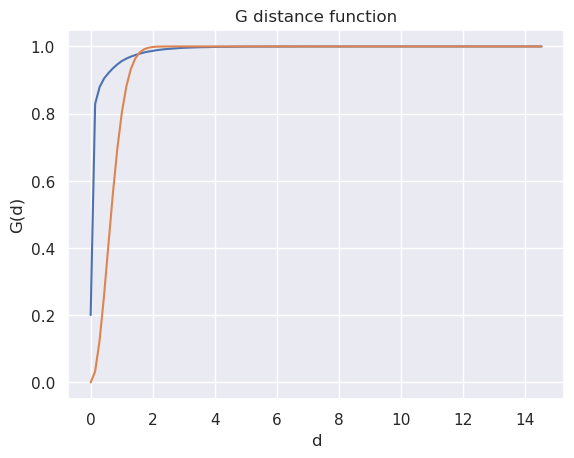

In [87]:
db12_G = pointpats.G(pp_db12_prep, intervals=100)
db12_G.plot()

In [88]:
yG = db12_G.G
xd = db12_G.d
interp_func = interp1d(xd, yG)
interp_xd = np.linspace(xd.min(), xd.max(), db12_prep.shape[0])
interp_yG = interp_func(interp_xd)

In [89]:
db12_prep['G'] = interp_yG
db12_prep.head()

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick,knn,G
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.200705
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.202756
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.204807
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.206858
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983,0.0,0.208909


> La función F detecta patrones en escala global por lo que es utilizada como un feature. Este estadístico tambíen confirma que estos puntos tienen un patrón agrupado.

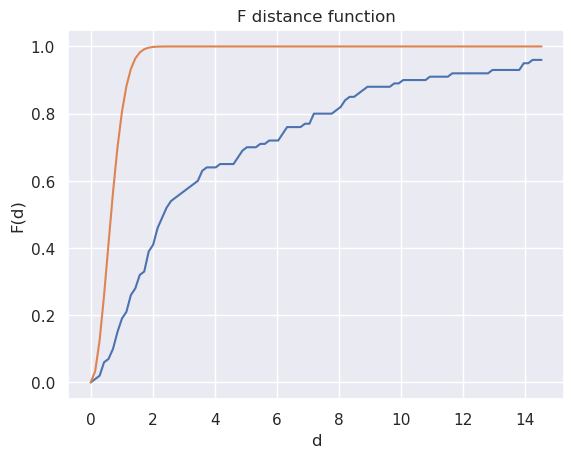

In [90]:
db12_F = pointpats.F(pp_db12_prep, intervals=100)
db12_F.plot()

In [91]:
yF = db12_F.F
xd = db12_F.d
interp_func = interp1d(xd, yF)
interp_xd = np.linspace(xd.min(), xd.max(), db12_prep.shape[0])
interp_yF = interp_func(interp_xd)

In [92]:
db12_prep['F'] = interp_yF
db12_prep.head()

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick,knn,G,F
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.200705,0.000000
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.202756,0.000033
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.204807,0.000065
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.206858,0.000098
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983,0.0,0.208909,0.000131


> La función J nos muestra la relación entrega función G y la función J. Este también se utiliza como feature.

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/pysal/explore/pointpats/distance_statistics.py:217: RuntimeWarning: invalid value encountered in divide
  self.ev = self.j / self.j


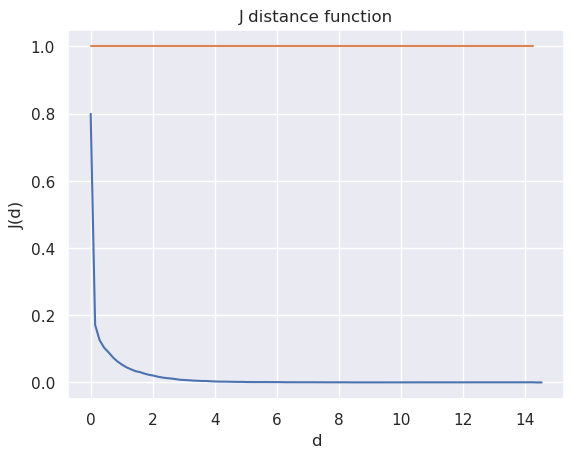

In [93]:
db12_J = pointpats.J(pp_db12_prep, intervals=100)
db12_J.plot()

In [94]:
yJ = db12_J.j
xd = db12_J.d
interp_func = interp1d(xd, yJ)
interp_xd = np.linspace(xd.min(), xd.max(), db12_prep.shape[0])
interp_yJ = interp_func(interp_xd)

In [95]:
db12_prep['J'] = interp_yJ
db12_prep.head()

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick,knn,G,F,J
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.200705,0.000000,0.799295
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.202756,0.000033,0.797244
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.204807,0.000065,0.795193
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.206858,0.000098,0.793142
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983,0.0,0.208909,0.000131,0.791091


> La función K es un estadístico de tipo local que se utiliza como feature.

> Debido al consumo de memoria que tiene el calculo de K debemos tomar una muestra del conjunto de datos

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


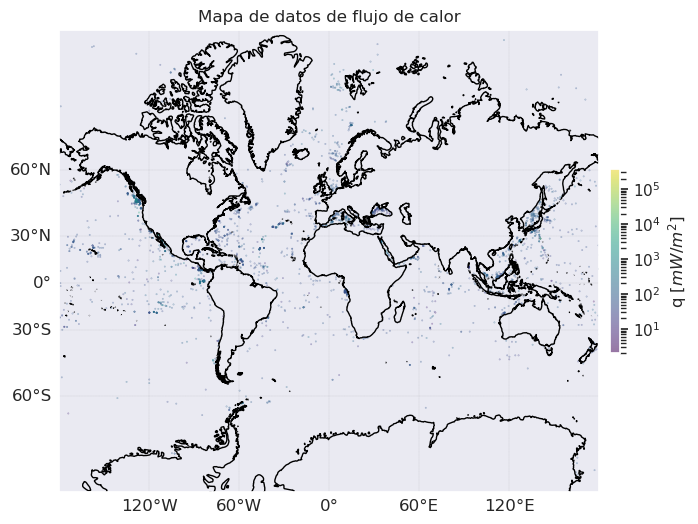

In [96]:
db12_prep3000 = db12_prep.sample(3000)
plotting.plot_map(db12_prep3000)

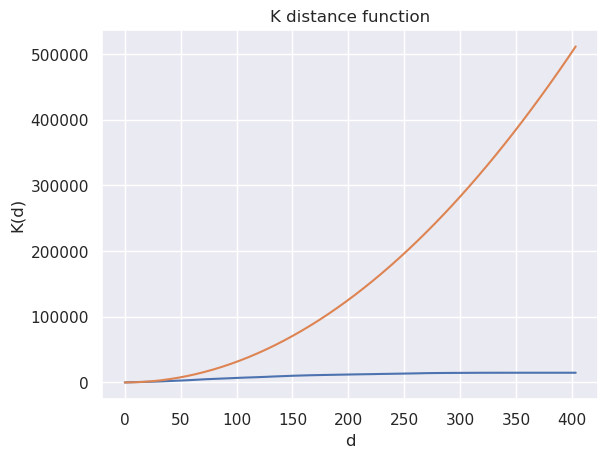

In [97]:
# db12_prep3000 = db12_prep[['lat', 'lng']].sample(n=3000, replace=False)
pp_db12_prep3000 = pointpats.PointPattern(db12_prep3000[['lat', 'lng']])
db12_K = pointpats.K(pp_db12_prep3000, intervals=50)
db12_K.plot()

In [98]:
yK = db12_K.k
xd = db12_K.d
interp_func = interp1d(xd, yK)
interp_xd = np.linspace(xd.min(), xd.max(), db12_prep.shape[0])
interp_yK = interp_func(interp_xd)

In [99]:
db12_prep['K'] = interp_yK
db12_prep.head()

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick,knn,G,F,J,K
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.200705,0.000000,0.799295,0.239940
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.202756,0.000033,0.797244,1.106536
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.204807,0.000065,0.795193,1.973131
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.206858,0.000098,0.793142,2.839727
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983,0.0,0.208909,0.000131,0.791091,3.706322


> La función L es simplemente una versión escalada de la función K aunque es posible que sea redundante con K se va a emplear como feature.

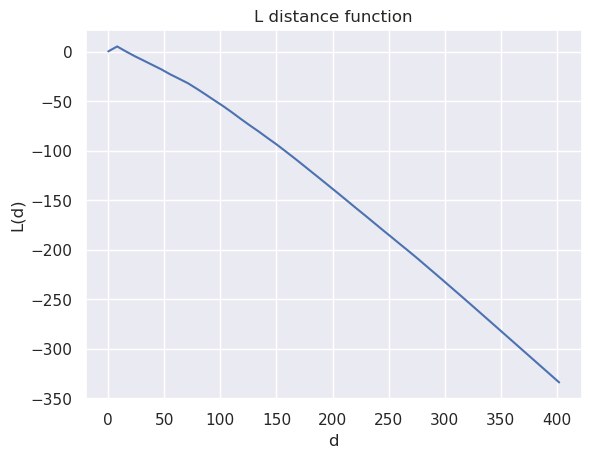

In [100]:
db12_prep3000 = db12_prep[['lat', 'lng']].sample(n=3000, replace=False)
pp_db12_prep3000 = pointpats.PointPattern(db12_prep3000)
db12_L = pointpats.L(pp_db12_prep3000, intervals=50)
db12_L.plot()

In [101]:
yL = db12_L.l
xd = db12_L.d
interp_func = interp1d(xd, yL)
interp_xd = np.linspace(xd.min(), xd.max(), db12_prep.shape[0])
interp_yL = interp_func(interp_xd)

In [102]:
db12_prep['L'] = interp_yL
db12_prep.head()

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick,knn,G,F,J,K,L
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.200705,0.000000,0.799295,0.239940,0.292253
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0,0.202756,0.000033,0.797244,1.106536,0.300442
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.204807,0.000065,0.795193,1.973131,0.308631
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0,0.206858,0.000098,0.793142,2.839727,0.316820
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983,0.0,0.208909,0.000131,0.791091,3.706322,0.325009


> Visualizamos las features.

In [104]:
# Definimos las variables categoricas
categorical = ['A_dom', 'A_reg', 'A_cont'] 
# Definimos las variables numericas
numeric = ['q', 'elevation', 'sedthick']
# Features extraidas
features = ['knn', 'G', 'F', 'J', 'K', 'L']
# Variables geoespaciales
coords = ['lat', 'lng']
temporal = 'A_year'

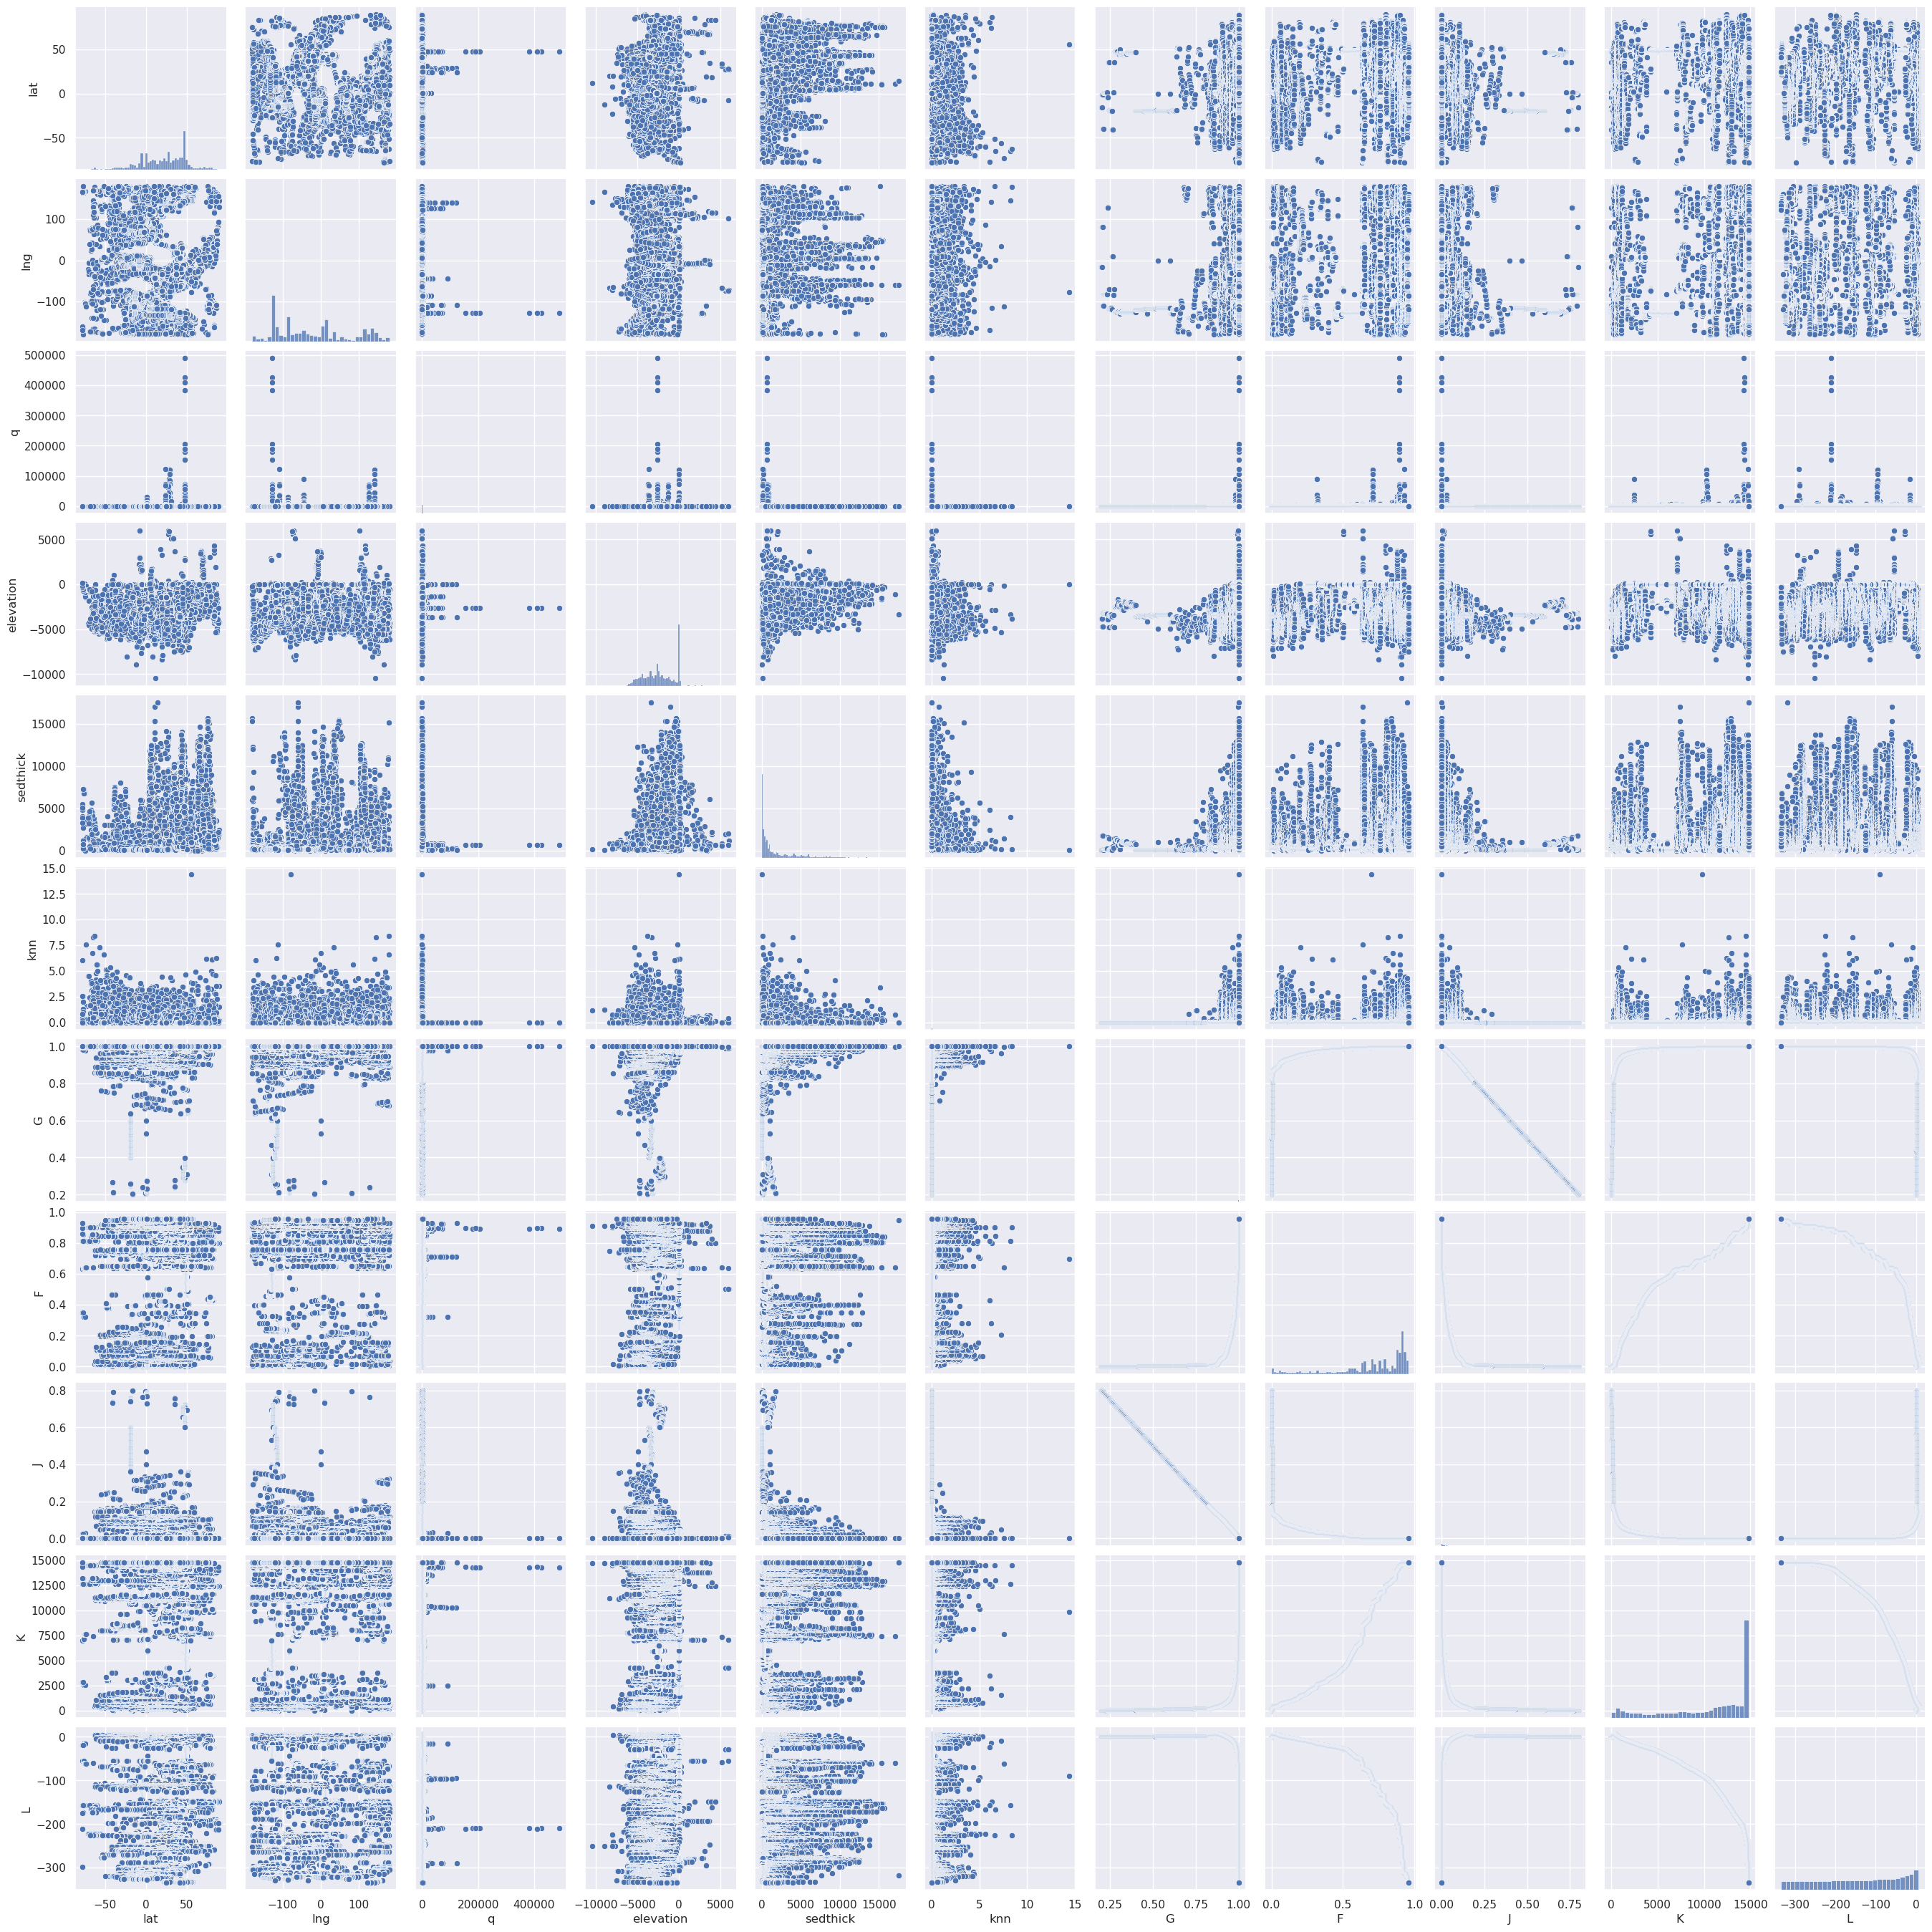

In [105]:
# Genera un pair plot para las columnas numéricas del DataFrame db12_prep
sns.pairplot(db12_prep[coords + numeric + features])

> Exportamos los datos generados

In [77]:
db12_prep.to_csv('/home/mofoko/Documents/Metodologias/tdsp_template/src/nombre_paquete/database/db12_features.csv')

In [78]:
!cd /home/mofoko/Documents/Metodologias/tdsp_template/src/nombre_paquete/database && ls -a && dvc add db12_features.csv && ls -a

.		       db12_prep_eda.csv      GlobSed.zip
..		       db12_prep_eda.csv.dvc  IHFC_2023_GHFDB.csv
data_loader.py	       db12_trans.csv	      IHFC_2023_GHFDB_pre.csv
db12_features.csv      db12_trans.csv.dvc     IHFC_2023_GHFDB_pre.csv.dvc
db12_features.csv.dvc  .gitignore	      __init__.py
db12_prep.csv	       GlobSed-v3.nc	      __pycache__
db12_prep.csv.dvc      GlobSed-v3.nc.dvc
⠋ Checking graph                                                 
Adding...                                                                       
!
  0% Checking cache in '/home/mofoko/Documents/Metodologias/tdsp_template/.dvc/c
                                                                                
!
  0%|          |Transferring                          0/? [00:00<?,     ?file/s]
  0%|          |Transferring                          0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out db12_features.csv        0/